In [90]:
# Import relevant Python libraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [91]:
# Load dataset into a dataframe
### YOUR CODE HERE ### 
df = pd.read_csv("ASA_All_PGA_Raw_Data_-_Tourn_Level[1].csv")

# Display first few rows of the dataframe
### YOUR CODE HERE ### 
df.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,n_rounds,made_cut,pos,finish_DKP,finish_FDP,finish_SDP,total_DKP,total_FDP,total_SDP,player,Unnamed: 2,Unnamed: 3,Unnamed: 4,tournament name,course,date,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,3,4,1,32.0,2,1,0,65.0,59.7,59,Abraham Ancer,NaN,NaN,NaN,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",2022-06-05,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,3,4,1,18.0,5,4,2,85.5,78.5,66,Adam Hadwin,NaN,NaN,NaN,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",2022-06-05,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,21.5,17.4,27,0,0.0,0,2,0,NaN,0,0,0,21.5,17.4,27,Anirban Lahiri,NaN,NaN,NaN,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",2022-06-05,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,20.5,13.6,17,0,0.4,0,2,0,NaN,0,0,0,20.5,14.0,17,Adam Long,NaN,NaN,NaN,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",2022-06-05,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,23.5,18.1,23,0,1.2,0,2,0,NaN,0,0,0,23.5,19.3,23,Alexander Noren,NaN,NaN,NaN,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",2022-06-05,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04


In [92]:
df.shape

(36864, 37)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   tournament id        36864 non-null  int64  
 2   player id            36864 non-null  int64  
 3   hole_par             36864 non-null  int64  
 4   strokes              36864 non-null  int64  
 5   hole_DKP             36864 non-null  float64
 6   hole_FDP             36864 non-null  float64
 7   hole_SDP             36864 non-null  int64  
 8   streak_DKP           36864 non-null  int64  
 9   streak_FDP           36864 non-null  float64
 10  streak_SDP           36864 non-null  int64  
 11  n_rounds             36864 non-null  int64  
 12  made_cut             36864 non-null  int64  
 13  pos                  21317 non-null  float64
 14  finish_DKP           36864 non-null  int64  
 15  finish_FDP           36864 non-null 

In [94]:
df.isna().sum()

Player_initial_last        0
tournament id              0
player id                  0
hole_par                   0
strokes                    0
hole_DKP                   0
hole_FDP                   0
hole_SDP                   0
streak_DKP                 0
streak_FDP                 0
streak_SDP                 0
n_rounds                   0
made_cut                   0
pos                    15547
finish_DKP                 0
finish_FDP                 0
finish_SDP                 0
total_DKP                  0
total_FDP                  0
total_SDP                  0
player                     0
Unnamed: 2             36864
Unnamed: 3             36864
Unnamed: 4             36864
tournament name            0
course                     0
date                       0
purse                      0
season                     0
no_cut                     0
Finish                  7683
sg_putt                 7684
sg_arg                  7684
sg_app                  7684
sg_ott        

In [95]:
df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',])

### Which variables have the best relationships with winning the masters at Augusta

In [96]:
#Lets get only the data from the masters tournament
masters_df = df[df['tournament name'] == 'Masters Tournament']
masters_df.shape

(660, 34)

In [97]:
#Lets drop columns we wont need
masters_df = masters_df.drop(columns = ['hole_DKP','streak_SDP','hole_FDP','hole_SDP','streak_DKP','streak_FDP','finish_DKP','finish_FDP','finish_SDP','total_DKP','total_FDP','total_SDP','season','Player_initial_last','player', 'tournament id', 'player id','n_rounds','tournament name','course','date','purse','no_cut','Finish','hole_par', 'strokes'])
masters_df.head(5)


,made_cut,pos,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
878,0,NaN,2.72,-2.87,-1.39,0.25,-4.00,-1.28
879,1,48.0,-0.11,-0.63,-0.60,-0.31,-1.54,-1.65
880,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,0,NaN,0.24,0.79,-1.07,-0.25,-0.52,-0.28
882,1,43.0,0.06,-0.57,0.83,-0.46,-0.20,-0.14


In [98]:
# Drop rows where 'made_cut' column has value 0
masters_df = masters_df[masters_df['made_cut'] != 0]

In [99]:
masters_df.dropna()
masters_df = masters_df.drop(columns = ['made_cut'])
masters_df.head(3)

,pos,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
879,48.0,-0.11,-0.63,-0.60,-0.31,-1.54,-1.65
882,43.0,0.06,-0.57,0.83,-0.46,-0.20,-0.14
885,39.0,-0.48,-0.97,0.52,1.03,0.58,0.10


In [100]:
masters_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 879 to 34806
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pos       435 non-null    float64
 1   sg_putt   49 non-null     float64
 2   sg_arg    49 non-null     float64
 3   sg_app    49 non-null     float64
 4   sg_ott    49 non-null     float64
 5   sg_t2g    49 non-null     float64
 6   sg_total  49 non-null     float64
dtypes: float64(7)
memory usage: 27.2 KB


E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

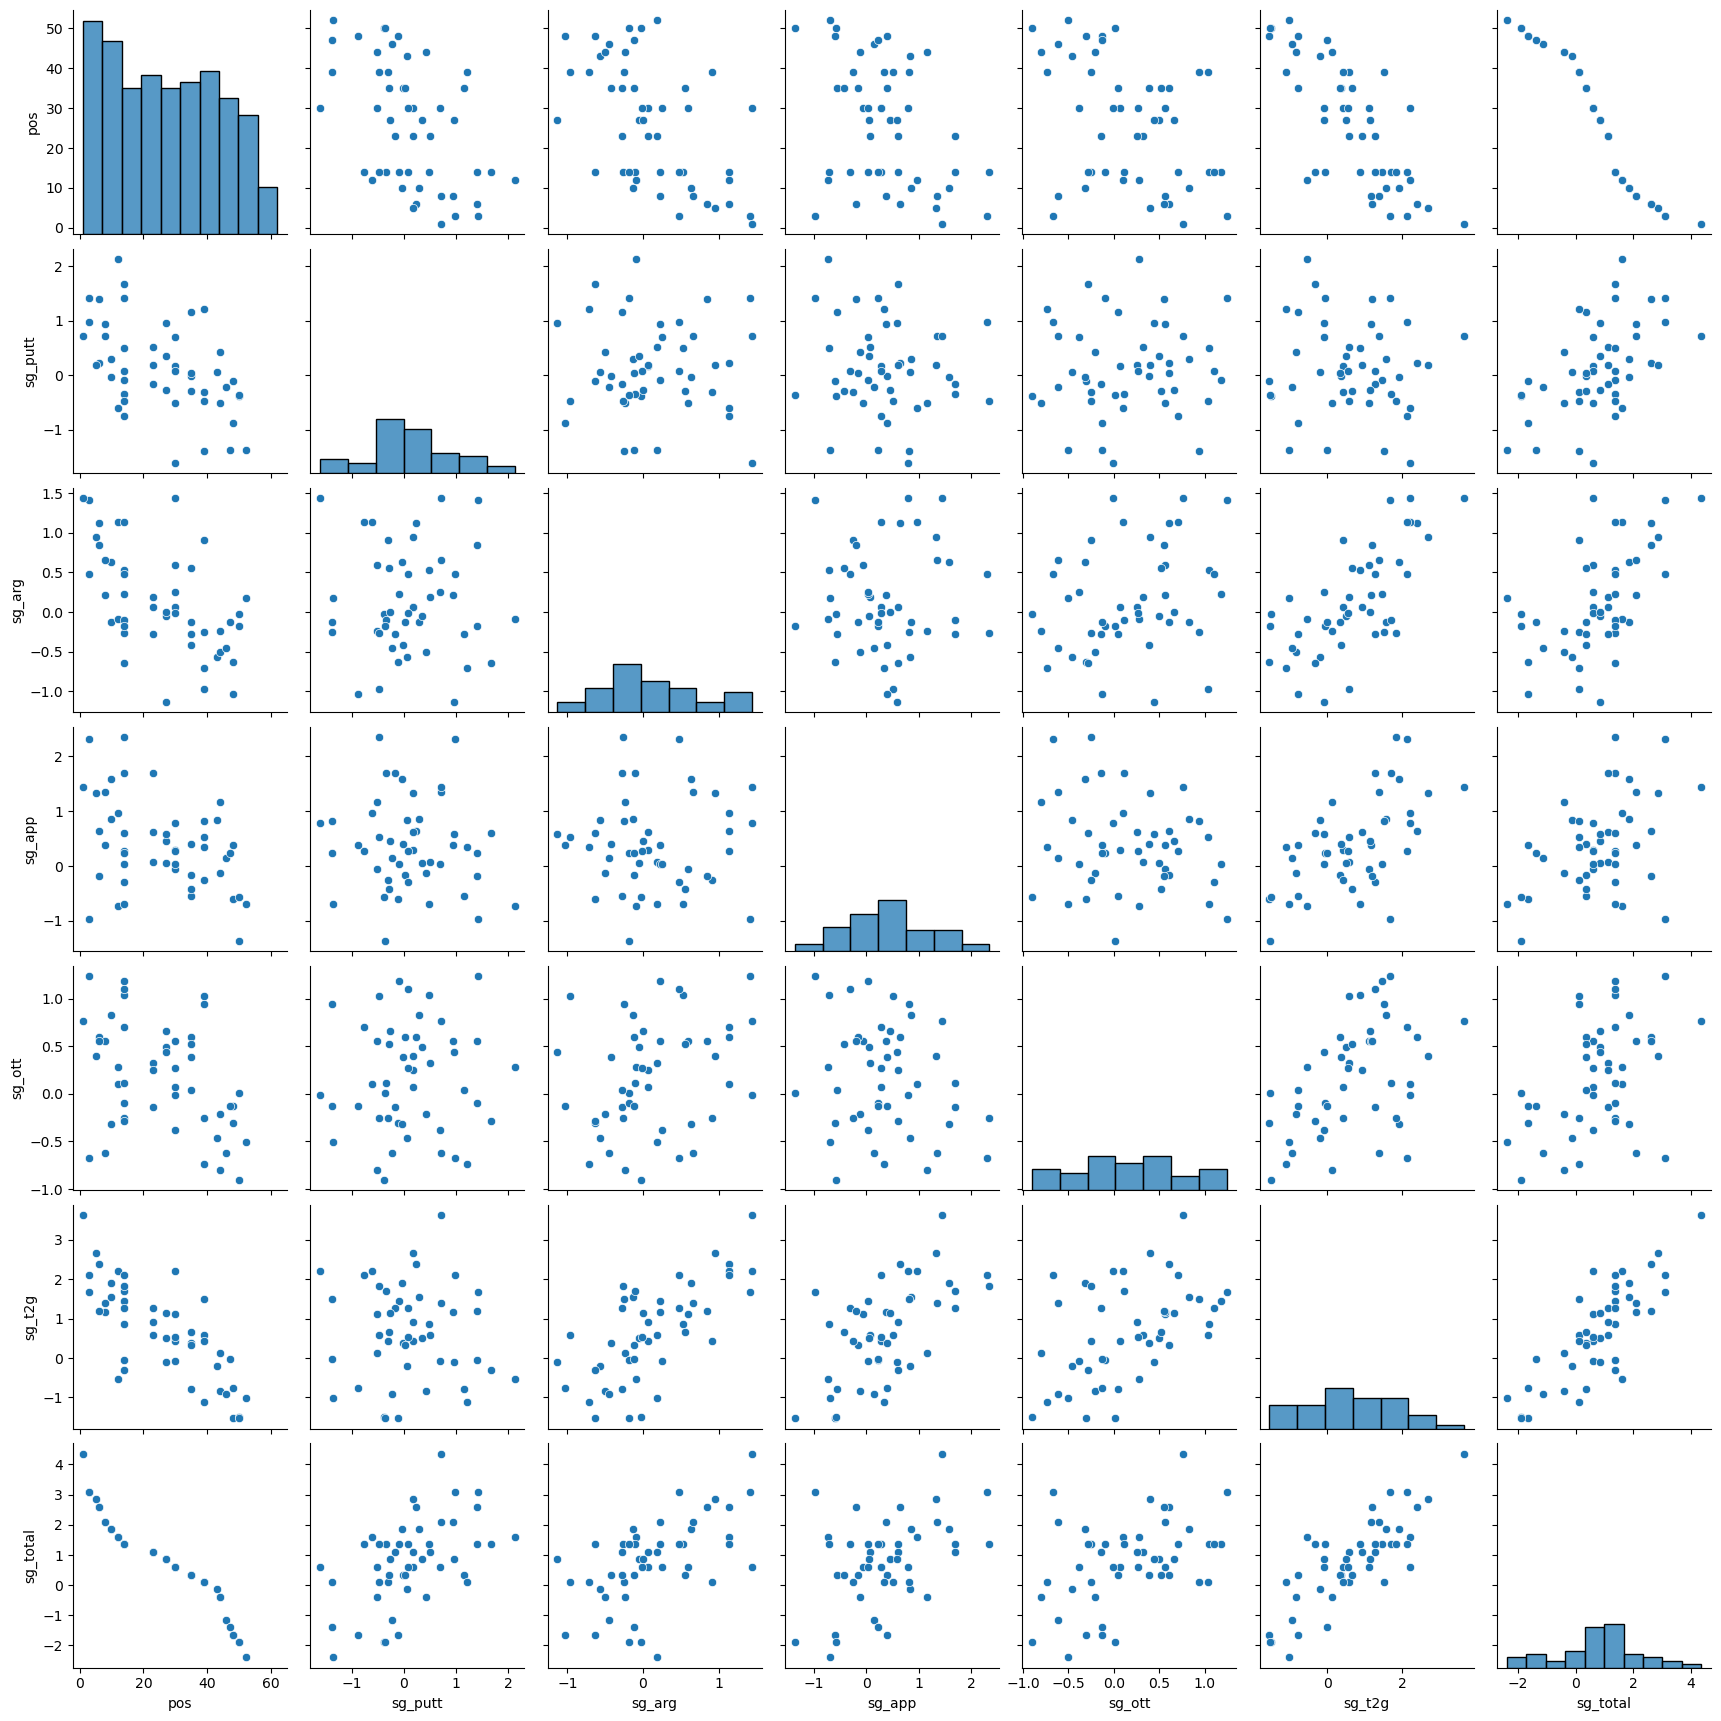

In [101]:
sns.pairplot(masters_df)

In [114]:
# Select relevant columns
# Save resulting DataFrame in a separate variable to prepare for regression

ols_data = masters_df[["pos", "sg_t2g"]]

In [115]:
ols_data.head(10)

,pos,sg_t2g
879,48.0,-1.54
882,43.0,-0.20
885,39.0,0.58
886,44.0,-0.83
887,10.0,1.56
888,6.0,2.38
889,46.0,-0.93
890,5.0,2.67
891,10.0,1.90
892,3.0,2.12


In [121]:
ols_formula = "sg_t2g ~ pos"

In [122]:
# Implement Ordinary Least Squares (OLS)

OLS = ols(formula = ols_formula, data = ols_data)

In [123]:
model = OLS.fit()

In [124]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sg_t2g   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     68.55
Date:                Fri, 10 May 2024   Prob (F-statistic):           9.79e-11
Time:                        11:28:41   Log-Likelihood:                -56.052
No. Observations:                  49   AIC:                             116.1
Df Residuals:                      47   BIC:                             119.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2211      0.218     10.174      0.000       1.782       2.660
pos           -0.0604      0.007     -8.279      0.000      -0.075      -0.046
==============================================================================
Omnibus:                        1.576   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                0.769
Skew:                          -0.177   Prob(JB):                        0.681
Kurtosis:                       3.502   Cond. No.                         59.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='pos', ylabel='sg_t2g'>

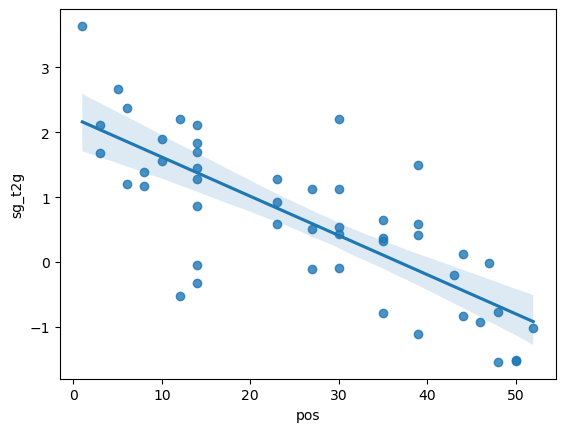

In [125]:
sns.regplot(x = "pos", y = "sg_t2g", data = ols_data)

For every increase in postion (the worse the golfer finishes) their Shot Gained-Tee to Green stat will decrease by .060